In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [101]:
numerical = pd.read_csv(r'C:\Users\sorig\Desktop\Random forest project\numerical.csv')
categorical = pd.read_csv(r'C:\Users\sorig\Desktop\Random forest project\categorical.csv')
target = pd.read_csv(r'C:\Users\sorig\Desktop\Random forest project\target.csv')
data1 = pd.concat([numerical,categorical,target], axis=1)
data1

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,91,11,92,7,95,12,90,1,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,87,11,94,11,95,12,87,2,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,93,10,96,1,96,1,79,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,96,2,96,2,96,2,96,2,0,0.0
95408,1,48.000000,7,9,1,0,31,43,19,4,...,96,3,96,3,96,3,96,3,0,0.0
95409,1,60.000000,5,9,0,0,18,46,20,7,...,96,3,95,1,96,10,94,10,0,0.0
95410,0,58.000000,7,9,0,0,28,35,20,9,...,90,11,96,8,97,1,86,12,1,18.0


In [102]:
data1['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [103]:
data = data1[data1['TARGET_B']==1]
data = data.sample(frac=1)
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
13120,2,91.0,5,1,1,0,21,24,47,6,...,93,1,95,12,95,12,86,10,1,25.0
44507,1,53.0,6,6,5,0,22,25,16,4,...,94,11,95,12,95,12,94,11,1,15.0
83271,1,53.0,2,2,0,0,41,36,40,13,...,90,3,92,7,96,3,90,3,1,15.0
22333,28,46.0,5,9,0,0,35,32,27,3,...,90,9,95,7,95,7,88,5,1,25.0
78688,0,77.0,2,6,3,0,30,20,49,12,...,88,9,93,4,95,8,88,9,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46831,28,44.0,4,2,1,0,28,31,29,8,...,95,4,95,4,95,4,95,4,1,5.0
35579,0,44.0,2,9,0,8,30,40,24,7,...,92,7,94,6,95,4,92,2,1,20.0
58314,28,76.0,2,9,0,0,56,23,55,14,...,91,6,95,12,95,12,91,6,1,15.0
49383,2,49.0,4,5,4,0,0,0,0,0,...,96,3,96,2,96,3,95,9,1,20.0


In [104]:
y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis = 1)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

numericalX_train   = X_train.select_dtypes(np.number)
numericalX_test    = X_test.select_dtypes(np.number)
categoricalX_train = X_train.select_dtypes(object) 
categoricalX_test  = X_test.select_dtypes(object) 

In [106]:
transformer = MinMaxScaler().fit(numericalX_train)
scaled_numerical_train = transformer.transform(numericalX_train)
scaled_numerical_train = pd.DataFrame(scaled_numerical_train, columns=numericalX_train.columns)
scaled_numerical_test  = transformer.transform(numericalX_test)
scaled_numerical_test  = pd.DataFrame(scaled_numerical_test, columns=numericalX_train.columns)

In [107]:
encoder = OneHotEncoder(drop='first').fit(categoricalX_train)
encoded_categorical_train = encoder.transform(categoricalX_train).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train, columns=encoder.get_feature_names_out())
encoded_categorical_test = encoder.transform(categoricalX_test).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test, columns=encoder.get_feature_names_out())

In [108]:
X_train_treated = pd.concat([scaled_numerical_train, encoded_categorical_train], axis = 1)
X_test_treated  = pd.concat([scaled_numerical_test,  encoded_categorical_test],  axis = 1)

In [109]:
X_train_treated

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000026,0.510638,0.500000,1.000000,0.000000,0.000000,0.367089,0.464646,0.161616,0.104167,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000718,0.478723,1.000000,1.000000,0.000000,0.000000,0.341772,0.484848,0.202020,0.083333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.414894,0.833333,0.777778,0.029167,0.000000,0.291139,0.303030,0.262626,0.083333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.500000,1.000000,1.000000,0.045833,0.093750,0.924051,0.444444,0.060606,0.312500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.797872,0.666667,1.000000,0.000000,0.000000,0.518987,0.313131,0.292929,0.041667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,0.000026,0.595745,0.666667,0.666667,0.000000,0.010417,0.493671,0.494949,0.212121,0.250000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3870,0.000051,0.595745,0.500000,1.000000,0.000000,0.000000,0.493671,0.373737,0.444444,0.125000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3871,0.000000,0.627660,0.500000,0.666667,0.000000,0.000000,0.392405,0.363636,0.141414,0.083333,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3872,0.000000,0.351064,1.000000,0.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [110]:
X_test_treated

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000000,0.531915,0.666667,1.000000,0.000000,0.187500,0.443038,0.414141,0.323232,0.145833,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000026,0.712766,0.500000,1.000000,0.000000,0.000000,0.354430,0.343434,0.333333,0.104167,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000718,0.468085,0.500000,0.555556,0.016667,0.083333,0.556962,0.515152,0.111111,0.250000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.612890,0.666667,1.000000,0.000000,0.041667,0.329114,0.171717,0.323232,0.020833,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.489362,0.333333,0.222222,0.012500,0.000000,0.291139,0.232323,0.616162,0.208333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.000000,0.808511,0.166667,0.444444,0.079167,0.000000,0.227848,0.262626,0.555556,0.187500,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
965,0.000000,0.659574,0.500000,1.000000,0.000000,0.000000,0.329114,0.323232,0.191919,0.062500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
966,0.000026,0.861702,0.500000,0.888889,0.045833,0.000000,0.594937,0.131313,0.838384,0.270833,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967,0.000026,0.531915,1.000000,1.000000,0.000000,0.031250,0.607595,0.282828,0.393939,0.187500,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [111]:
model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3= RandomForestRegressor()

In [112]:
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'RandomForestRegressor']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_treated, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)


{'Decision Tree Regressor': -0.0007204780483280659, 'Linear Regression': 0.3365535080069594, 'RandomForestRegressor': 0.4866081139464157}


In [113]:
# with pca

In [114]:
pca = PCA()
pca.fit(X_train_treated)

PCA()

In [115]:
exp_var_pca = pca.explained_variance_ratio_

In [149]:
# exp_var_pca 

In [150]:
cum_sum_variance = np.cumsum(exp_var_pca)
# cum_sum_variance

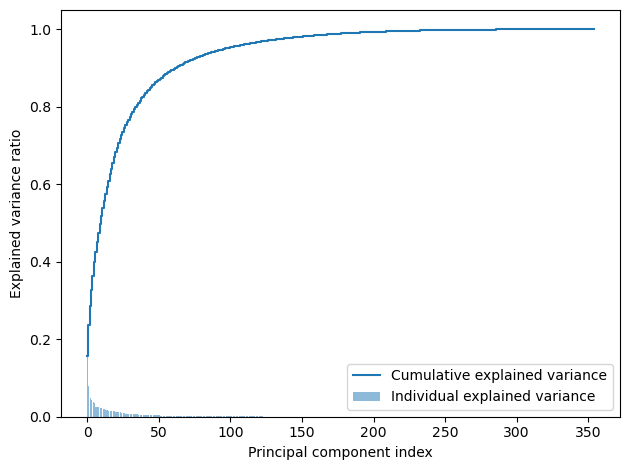

In [118]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_variance)), cum_sum_variance, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [119]:
pca = PCA(n_components = 0.95)
pca.fit(X_train_treated)
reduced_train = pca.transform(X_train_treated)
reduce_test=pca.transform(X_test_treated)

In [120]:
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'RandomForestRegressor']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, reduced_train, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': -0.3555282599715198, 'Linear Regression': 0.36521820506949193, 'RandomForestRegressor': 0.2755231537246691}


In [121]:
reduced_train_df = pd.DataFrame(pca.transform(X_train_treated))

In [122]:
reduced_test_df = pd.DataFrame(pca.transform(X_test_treated))

In [123]:
reduced_train_df

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.511455,0.583524,-1.139721,-0.653976,-0.818025,-0.117390,-0.582985,-0.241899,0.124658,-0.160268,...,-0.020446,-0.012370,-0.204262,0.034944,-0.044745,-0.003461,-0.060250,0.089161,-0.061380,-0.204514
1,-0.828776,-1.173571,1.183129,-0.598905,-0.905539,0.389083,0.645698,0.403568,0.344604,0.158795,...,-0.032899,-0.081815,-0.012106,-0.078223,-0.087545,0.016523,-0.014406,0.058291,-0.082667,-0.076646
2,-1.748243,0.244836,0.370958,-0.167864,-0.251847,-0.650171,0.364019,-0.183757,-0.194280,0.455093,...,0.062354,-0.073311,-0.170122,0.080069,-0.067211,-0.072215,-0.033849,-0.008558,0.051458,0.138571
3,-1.186697,-1.978683,0.407792,1.615257,0.098816,-0.031180,0.473105,0.585074,-0.032515,0.390867,...,-0.032558,0.022079,0.174910,-0.249863,0.165947,0.033698,0.184184,0.292030,-0.291657,-0.131744
4,0.541227,0.519813,-0.860375,-0.736801,0.184663,-0.386810,-0.601950,0.017937,0.168620,-0.793474,...,-0.015817,-0.052476,-0.301453,-0.107920,0.113640,0.148140,-0.063634,0.010435,-0.151993,0.038072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,-1.686112,-1.164753,0.389547,-0.589645,-0.006945,-0.491441,-0.444119,0.217778,-0.217069,0.489922,...,-0.092537,0.071941,0.147043,0.018129,-0.054960,0.001677,0.051326,-0.005284,-0.057305,0.060467
3870,0.077769,-0.534636,-0.286645,-0.584518,0.827841,0.400303,0.539709,0.279030,0.985568,0.031216,...,0.024535,-0.027532,0.037621,0.109952,-0.099803,-0.203912,-0.008194,0.036097,-0.033612,-0.076140
3871,-0.165414,-1.147680,1.272516,-1.246820,0.808228,-0.124693,-0.232596,-1.419919,0.526643,0.087650,...,-0.084451,-0.077812,0.073176,-0.144453,-0.155796,-0.020803,0.041423,0.026235,0.042556,0.038827
3872,-0.358751,0.327019,0.969290,-0.034465,0.387704,0.086582,-0.134943,-0.765921,-0.665951,0.172650,...,-0.060478,0.150395,0.067173,-0.041063,0.007215,-0.122929,-0.072605,-0.023402,0.026601,0.012126


In [124]:
reduced_test_df

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.910829,-0.071299,0.140744,-0.078238,-0.733137,0.483432,0.968890,0.644597,0.781617,0.098515,...,0.077921,-0.063661,0.080168,-0.097702,0.146520,-0.058497,-0.160924,0.063624,-0.023409,-0.055611
1,0.699578,-0.948130,0.057961,-0.112928,0.793433,-0.681092,-0.446007,-0.303563,-0.359168,0.376233,...,0.013869,0.006398,0.001213,0.001288,0.052438,0.018061,-0.022624,-0.030754,-0.027506,-0.024881
2,0.347913,-0.115158,-0.132544,-1.548161,0.189881,-0.168657,-0.631717,-0.146474,-0.189342,-0.207643,...,-0.122917,0.022705,0.056157,0.016789,-0.105104,0.055032,0.025733,0.034570,-0.105301,0.048861
3,0.224913,1.835281,0.878321,0.033901,-0.993774,0.059012,-0.894304,0.614203,-0.752194,-0.548516,...,-0.114635,-0.134646,-0.074796,0.022057,0.136046,0.076260,-0.238895,0.048946,0.128600,-0.044519
4,0.091899,2.809780,-0.260677,0.439207,-0.628665,-1.070915,0.195431,-0.552043,0.320446,-0.247416,...,-0.206194,-0.004332,0.030747,-0.004028,-0.202046,0.129406,-0.043710,-0.064683,0.018534,-0.076609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1.605408,1.081322,-0.158339,-0.316232,0.963279,0.680370,1.319612,0.499827,0.341306,-0.152928,...,0.059955,0.091020,0.122217,0.028755,-0.145435,0.007700,-0.035087,-0.058597,0.143491,0.094407
965,-1.621257,1.216463,0.922885,0.594856,-0.912073,-1.463973,0.223382,0.395948,-0.899023,-0.372251,...,-0.022638,0.056893,-0.158207,0.155855,0.059837,0.028464,0.045357,-0.024951,-0.039386,0.001601
966,-0.395434,0.752533,0.850556,1.250294,0.479077,2.597350,-0.446006,0.118917,0.053810,0.392329,...,0.155851,-0.079291,0.077631,0.171776,0.047687,-0.039359,0.136957,-0.161804,-0.263597,0.086289
967,-1.258496,-1.273988,-0.098207,0.768728,0.761610,0.949454,0.378055,0.908841,0.514037,0.471476,...,-0.160246,-0.094971,0.099369,-0.083275,0.012372,0.077386,-0.245392,0.138828,0.253073,-0.223932


In [125]:
reduced_X = pd.concat([reduced_train_df, reduced_test_df], axis=0)

In [126]:
def variance_threshold_selector(data, threshold=0.02):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]



In [127]:
var_select_X = pd.DataFrame(variance_threshold_selector(reduced_X, threshold=0.02))
var_select_X

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.511455,0.583524,-1.139721,-0.653976,-0.818025,-0.117390,-0.582985,-0.241899,0.124658,-0.160268,...,0.502067,-0.257970,-0.090225,-0.031992,-0.204841,0.076627,-0.124242,0.058152,-0.013257,0.273839
1,-0.828776,-1.173571,1.183129,-0.598905,-0.905539,0.389083,0.645698,0.403568,0.344604,0.158795,...,0.039387,0.122681,0.067076,-0.016757,0.154191,-0.105790,-0.026630,0.002571,-0.026241,-0.141213
2,-1.748243,0.244836,0.370958,-0.167864,-0.251847,-0.650171,0.364019,-0.183757,-0.194280,0.455093,...,-0.025239,0.045314,-0.036170,-0.046451,0.052776,0.024277,-0.071319,0.023473,-0.009540,0.006771
3,-1.186697,-1.978683,0.407792,1.615257,0.098816,-0.031180,0.473105,0.585074,-0.032515,0.390867,...,-0.074184,0.206160,-0.122743,0.153273,-0.130775,-0.126409,0.018456,-0.013065,-0.270506,0.291383
4,0.541227,0.519813,-0.860375,-0.736801,0.184663,-0.386810,-0.601950,0.017937,0.168620,-0.793474,...,0.175117,-0.171642,-0.078823,-0.109681,-0.057426,0.019854,-0.021488,0.019508,0.041772,0.237064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1.605408,1.081322,-0.158339,-0.316232,0.963279,0.680370,1.319612,0.499827,0.341306,-0.152928,...,-0.083207,0.133600,0.002467,-0.026419,-0.103968,0.071780,0.059980,-0.136392,-0.110429,0.033243
965,-1.621257,1.216463,0.922885,0.594856,-0.912073,-1.463973,0.223382,0.395948,-0.899023,-0.372251,...,-0.188573,-0.012015,0.007934,-0.113557,0.123752,-0.066426,-0.041508,0.156494,0.084329,-0.057031
966,-0.395434,0.752533,0.850556,1.250294,0.479077,2.597350,-0.446006,0.118917,0.053810,0.392329,...,-0.035658,0.035430,0.096013,-0.403394,-0.204447,0.285671,-0.249774,0.108029,0.170988,0.032211
967,-1.258496,-1.273988,-0.098207,0.768728,0.761610,0.949454,0.378055,0.908841,0.514037,0.471476,...,-0.131811,-0.029719,0.044863,-0.120062,-0.134076,0.210597,-0.257139,0.161063,-0.134650,-0.141977


In [128]:
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'RandomForestRegressor']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, reduced_train_df, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': -0.321979278697829, 'Linear Regression': 0.36521820506949193, 'RandomForestRegressor': 0.2691046959723996}


In [129]:
#no feature selection, only encoding and scaling

In [130]:
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'RandomForestRegressor']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_test_treated, y_test, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': -1.1232612457060411, 'Linear Regression': -0.09271159440251271, 'RandomForestRegressor': 0.3634756315193428}


In [131]:
#with pca

In [132]:
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'RandomForestRegressor']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, reduce_test, y_test, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': -0.9759922522300941, 'Linear Regression': 0.30142445099576076, 'RandomForestRegressor': 0.13672055420906024}


In [133]:
def variance_threshold_selector(data, threshold=0.02):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [134]:
x_test_pcared= pd.DataFrame(variance_threshold_selector(reduced_test_df, threshold=0.02))

In [135]:
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'RandomForestRegressor']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, x_test_pcared, y_test, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': -1.3794012182119448, 'Linear Regression': 0.29816515346162537, 'RandomForestRegressor': 0.1345140704876574}


In [136]:
# gonna use RandomForestRegressor on the initial data.chosing hyperparameters now

In [137]:
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
             "max_depth"        : [4,5,6],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [8, 14, 20],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
grid.fit(X_train_treated, y_train)
print(grid.best_score_ , grid.best_params_)

C:\Users\sorig\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.5139316224109063 {'bootstrap': True, 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 30}


In [157]:
rf = RandomForestRegressor(max_depth=4, 
                             bootstrap=True,
                             min_samples_split=20, 
                             n_estimators =20, 
                             max_features=1.0)
rf.fit(X_train_treated, y_train)
print(rf.score(X_train_treated, y_train))
print(rf.score(X_test_treated, y_test))


0.6658225605482594
0.42477139410055254


In [153]:
# mse, rmse scores

In [158]:
predictions_test = rf.predict(X_test_treated)

In [159]:
mse=mean_squared_error(y_test,predictions_test)
mse

92.28200523613135

In [160]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse


9.606352337705054

In [163]:
X_f = pd.concat([X_train_treated, X_test_treated], axis = 0)
X_f

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.000026,0.510638,0.500000,1.000000,0.000000,0.00000,0.367089,0.464646,0.161616,0.104167,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000718,0.478723,1.000000,1.000000,0.000000,0.00000,0.341772,0.484848,0.202020,0.083333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.414894,0.833333,0.777778,0.029167,0.00000,0.291139,0.303030,0.262626,0.083333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.500000,1.000000,1.000000,0.045833,0.09375,0.924051,0.444444,0.060606,0.312500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.797872,0.666667,1.000000,0.000000,0.00000,0.518987,0.313131,0.292929,0.041667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.000000,0.808511,0.166667,0.444444,0.079167,0.00000,0.227848,0.262626,0.555556,0.187500,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
965,0.000000,0.659574,0.500000,1.000000,0.000000,0.00000,0.329114,0.323232,0.191919,0.062500,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
966,0.000026,0.861702,0.500000,0.888889,0.045833,0.00000,0.594937,0.131313,0.838384,0.270833,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967,0.000026,0.531915,1.000000,1.000000,0.000000,0.03125,0.607595,0.282828,0.393939,0.187500,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [164]:
y_pred = rf.predict(X_f)

In [165]:
y_pred

array([11.11545175, 18.6595962 , 25.30927764, ..., 25.30927764,
        9.28643767, 42.3826177 ])